In [1]:
include("install_pkg.jl")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  99.9 %0.0 %Fetching: [=====>                                   ]  11.0 %Fetching: [=====>                                   ]  12.2 %Fetching: [======>                                  ]  12.7 %Fetching: [=======>                                 ]  15.3 %Fetching: [=======>                                 ]  16.4 %Fetching: [========>                                ]  19.2 %Fetching: [=============>                           ]  32.2 %Fetching: [================>                        ]  38.8 %Fetching: [====================>                    ]  49.4 %Fetching: [=========================>               ]  60.4 %Fetching: [==========================>              ]  63.7 %Fetching: [==========================>              ]  64.7 %Fetching: [===========================>             ]  66.1 %Fetching: [========

In [1]:
include("src/main.jl")

using ProgressBars
using HDF5, JLD
using DelimitedFiles
using Dates
using ProfileView
using Profile


Id = SparseArrays.I

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/ayedm/.julia/packages/PyPlot/4wzW1/src/init.jl:192


LinearAlgebra.UniformScaling{Bool}
true*I

In [128]:
results_folder = "results/data_for_kn_medium/fixed sigma"

results_folder = "results/sbm_1200/fixed sigma"
#results_folder = "results/amazon_10000/free sigma"

chains_names = first(walkdir(results_folder))[2]

15-element Array{String,1}:
 "07-04-20_01-07-31"
 "07-04-20_01-09-27"
 "07-04-20_01-10-34"
 "07-04-20_01-14-18"
 "07-04-20_01-17-18"
 "07-04-20_01-24-04"
 "07-04-20_01-34-07"
 "07-04-20_01-43-52"
 "07-04-20_01-45-40"
 "07-04-20_01-49-59"
 "07-04-20_01-55-12"
 "07-04-20_01-57-19"
 "07-04-20_12-56-45"
 "07-04-20_13-04-37"
 "07-04-20_13-06-28"

In [129]:
# Load variables of each chain

n_active_list = Dict()
kappa_list = Dict()
sigma_list = Dict()
tau_list = Dict()
alpha_list = Dict()
beta_list = Dict()

M = length(chains_names)
for m in 1:M
  load_dir = string(results_folder,"/",chains_names[m],"/variables/")
  variables = load(string(load_dir,"variables.jld"))
  n_active_list[m] = variables["n_active_list"]
  kappa_list[m] = variables["kappa_list"]
  sigma_list[m] = variables["sigma_list"]
  tau_list[m] = variables["tau_list"]
  alpha_list[m] = variables["alpha_list"]
  beta_list[m] = variables["beta_list"]
end

ErrorException: File results/sbm_1200/fixed sigma/07-04-20_01-07-31/variables/variables.jld cannot be found

In [122]:
load_dir = string(results_folder,"/",chains_names[1],"/variables/")
variables = load(string(load_dir,"variables.jld"))

Dict{String,Any} with 15 entries:
  "skip"             => 50
  "n_iter"           => 2000
  "ind_clusterings"  => [1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, …
  "prop_params"      => Dict{Any,Any}("sigma"=>0.02,"alpha"=>0.02,"kappa"=>0.02…
  "tau_list"         => [3.19685, 3.33673, 4.98238, 3.18472, 1.93296, 2.49377, …
  "alpha_list"       => [0.0742107, 0.0703201, 0.0714066, 0.0716519, 0.0744649,…
  "partition_"       => Dict(4=>…
  "sentAndReceived_" => Dict(4=>[0, 0, 1, 0, 0, 0, 0, 2, 0, 79  …  2, 4, 9, 0, …
  "beta_list"        => [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5  …  0…
  "sigma_list"       => [0.0131937, -0.0961304, -0.150905, -0.100969, -0.094755…
  "clusterings"      => [2 1 … 2 2; 3 3 … 4 3; … ; 4 5 … 3 4; 1 2 … 1 1]
  "prior_params"     => Dict{Any,Any}("sigma"=>(0.1, 0.1),"alpha"=>(0.1, 0.1),"…
  "kappa_list"       => [1.97748, 1.90871, 3.91498, 1.93497, 2.25288, 1.2336, 0…
  "activities_list"  => [18.1449 15.2254 … 1.81027 1.76957; 17.7513 16.614

In [123]:
# Make sure that all chains have same number of iterations
T = length(n_active_list[1])
print(string("All chains have ", T, " iterations = ",
            all([T == length(chain) for chain in values(n_active_list)])))

All chains have 2000 iterations = true

In [124]:
# Concatenate values after burn
burn = Int(T/2)

kn_array = vcat([chain[burn:T] for chain in values(n_active_list)]...);
sigma_array = vcat([chain[burn:T] for chain in values(sigma_list)]...);
alpha_array = vcat([chain[burn:T] for chain in values(alpha_list)]...);
tau_array = vcat([chain[burn:T] for chain in values(tau_list)]...);

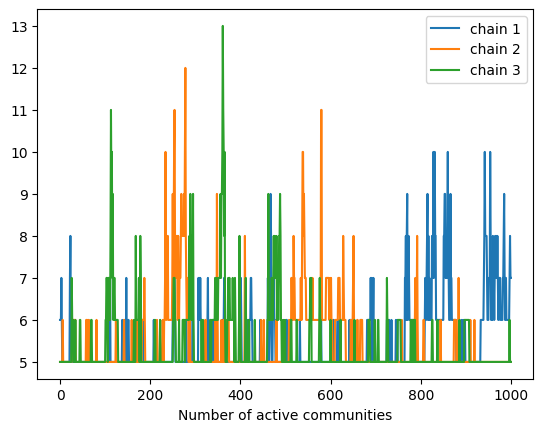

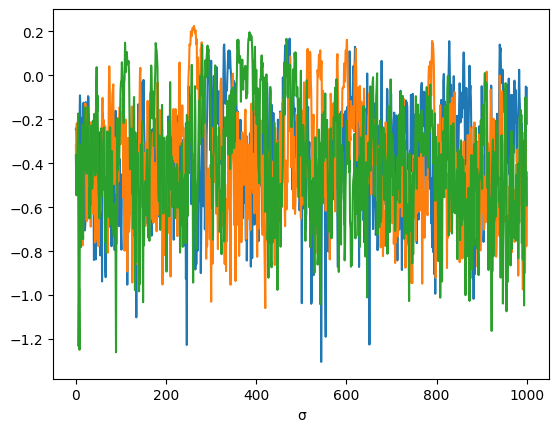

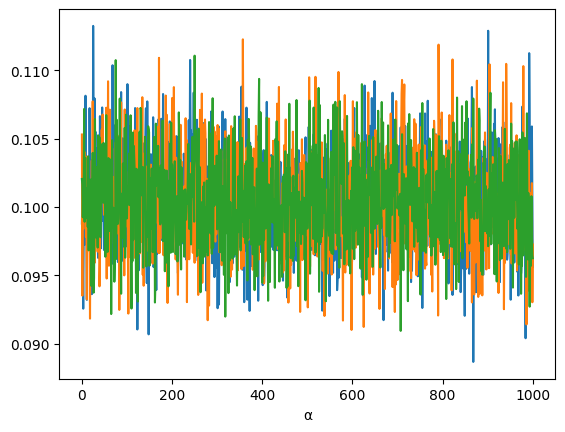

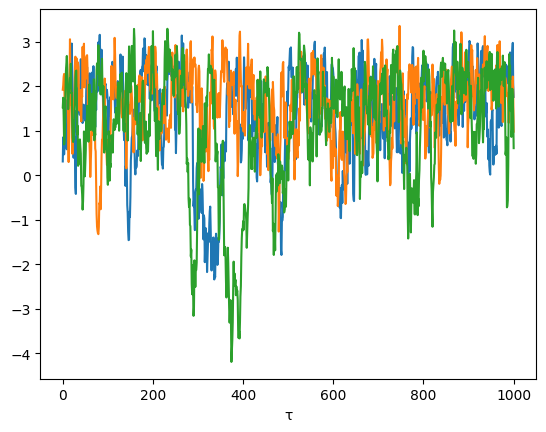

PyObject Text(0.5, 24.0, 'τ')

In [125]:
PyPlot.figure(figsize=(6.40,4.80))


for (m, chain) in enumerate(values(n_active_list))
    PyPlot.plot(chain[burn:T], label="chain $m")
end
PyPlot.legend()
PyPlot.xlabel("Number of active communities")

PyPlot.figure(figsize=(6.40,4.80))
for chain in values(sigma_list)
    PyPlot.plot(chain[burn:T])
end
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
for chain in values(alpha_list)
    PyPlot.plot(chain[burn:T])
end
PyPlot.xlabel("α")

PyPlot.figure(figsize=(6.40,4.80))
for chain in values(tau_list)
    PyPlot.plot(log.(chain[burn:T]))
end
PyPlot.xlabel("τ")

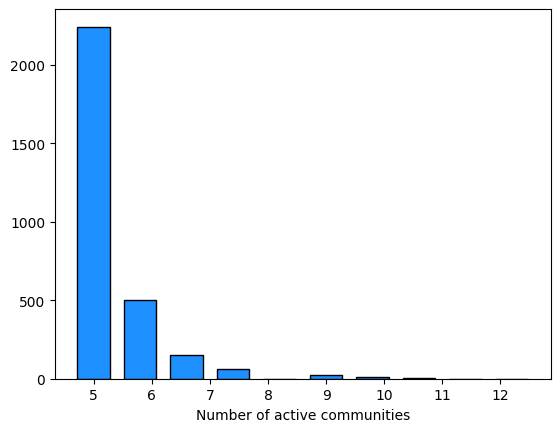

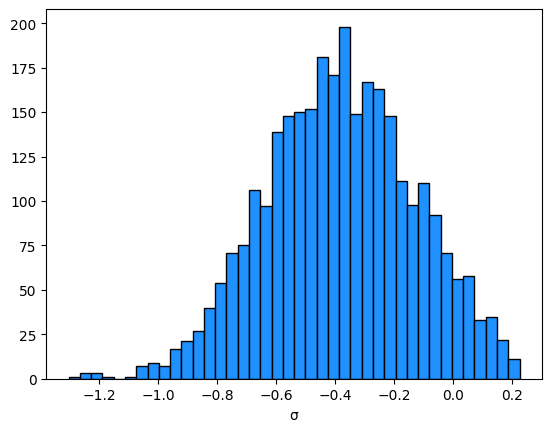

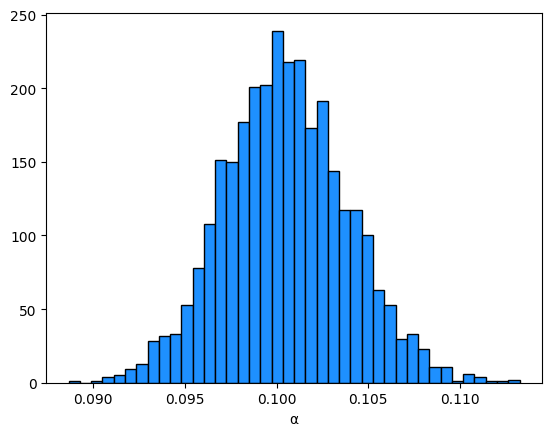

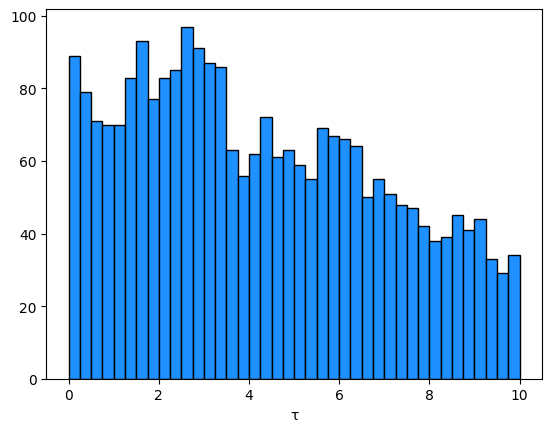

PyObject Text(0.5, 24.0, 'τ')

In [126]:
# Plot histograms
# Amazon

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,2800))
PyPlot.hist(kn_array,
            #range=(4,14),
            edgecolor="black",
            align="left",
            facecolor="dodgerblue",
            rwidth=0.7);
PyPlot.xlabel("Number of active communities")


PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,300))
PyPlot.hist(sigma_array,
            #range=(-1,0.5),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,1200))
PyPlot.hist(alpha_array,
            #range=(0.07,0.13),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("α")

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,1200))
PyPlot.hist(tau_array,
            range=(0.,10.),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("τ")

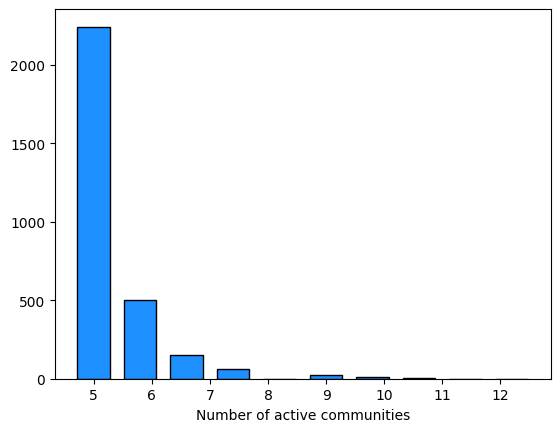

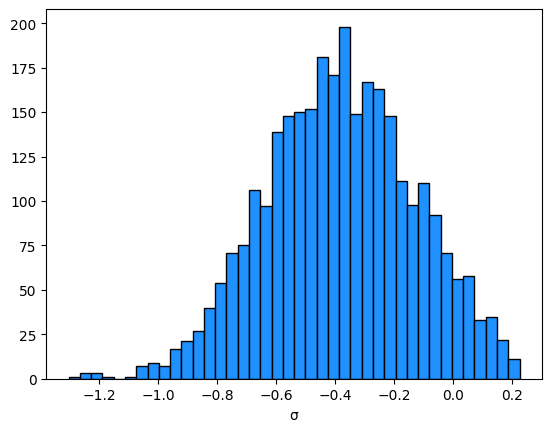

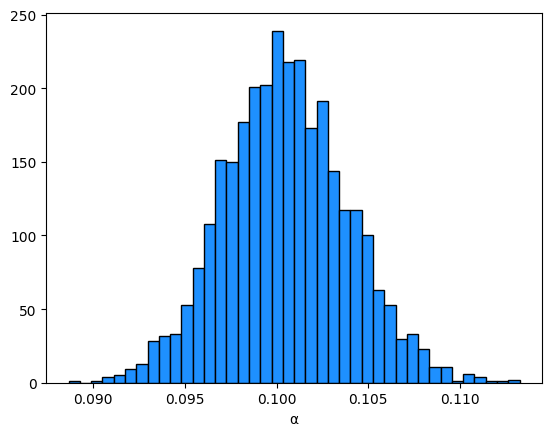

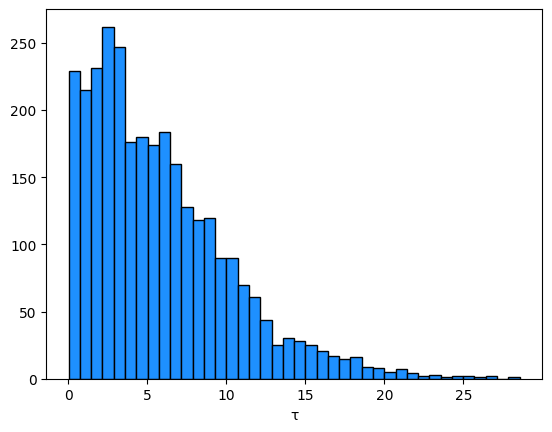

Mean and variance of the posterior Kn = (5.3992673992674, 0.7316050593865376)
95% credible region of the posterior Kn = (5.0, 8.0)


In [127]:
# Plot histograms
# Small

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,2800))
PyPlot.hist(kn_array,
            #range=(4,14),
            edgecolor="black",
            align="left",
            facecolor="dodgerblue",
            rwidth=0.7);
PyPlot.xlabel("Number of active communities")


PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,300))
PyPlot.hist(sigma_array,
            #range=(-1,0.5),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,1200))
PyPlot.hist(alpha_array,
            #range=(0.07,0.13),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("α")

PyPlot.figure(figsize=(6.40,4.80))
#PyPlot.ylim((0,1200))
PyPlot.hist(tau_array,
            #range=(0.,10.),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("τ")

println(string("Mean and variance of the posterior Kn = (",
            mean(kn_array), ", ",
            var(kn_array), ")") )

println(string("95% credible region of the posterior Kn = (",
            quantile(kn_array, 0.025), ", ",
            quantile(kn_array, 0.975), ")") )

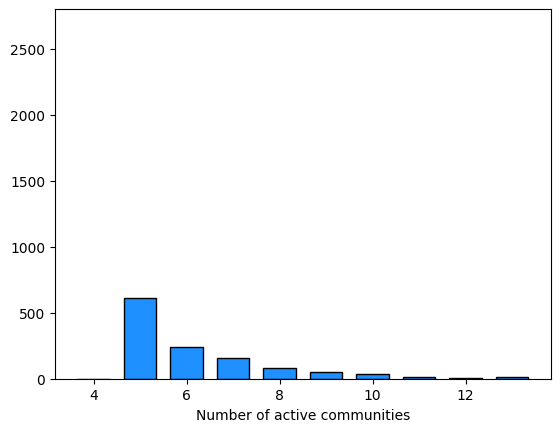

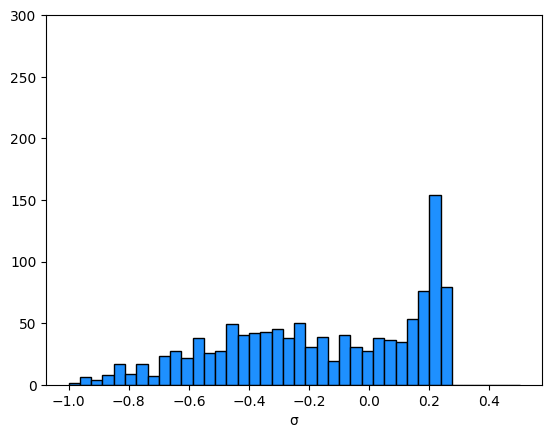

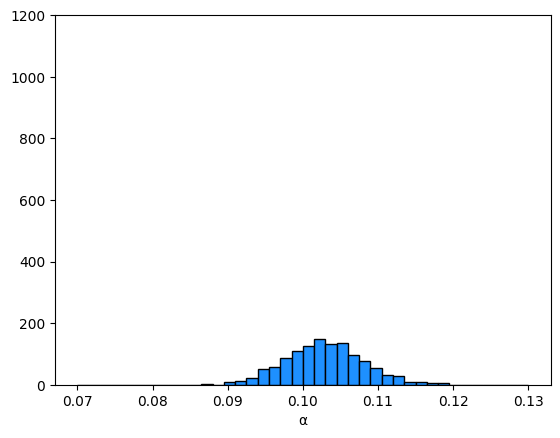

PyObject Text(0.5, 24.0, 'α')

In [81]:
# Plot histograms
# Medium

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,2800))
PyPlot.hist(kn_array,
            range=(4,14),
            edgecolor="black",
            align="left",
            facecolor="dodgerblue",
            rwidth=0.7);
PyPlot.xlabel("Number of active communities")


PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,300))
PyPlot.hist(sigma_array,
            range=(-1,0.5),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,1200))
PyPlot.hist(alpha_array,
            range=(0.07,0.13),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("α")

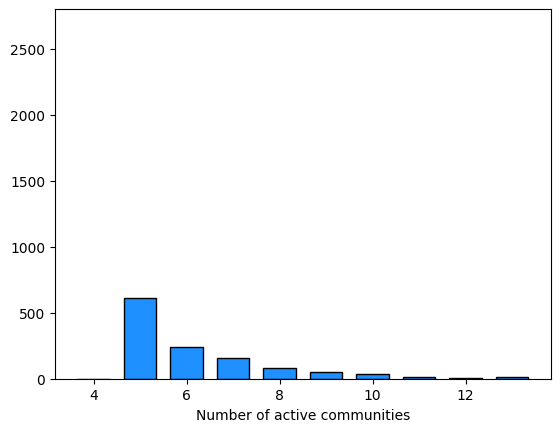

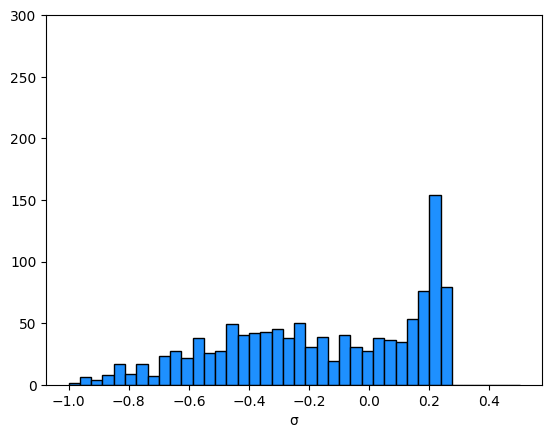

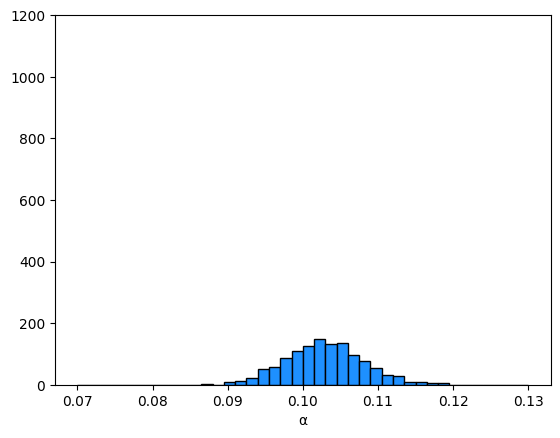

PyObject Text(0.5, 24.0, 'α')

In [82]:
# Plot histograms
# Large

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,2800))
PyPlot.hist(kn_array,
            range=(4,14),
            edgecolor="black",
            align="left",
            facecolor="dodgerblue",
            rwidth=0.7);
PyPlot.xlabel("Number of active communities")


PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,300))
PyPlot.hist(sigma_array,
            range=(-1,0.5),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("σ")

PyPlot.figure(figsize=(6.40,4.80))
PyPlot.ylim((0,1200))
PyPlot.hist(alpha_array,
            range=(0.07,0.13),
            bins=40,
            edgecolor="black",
            #align="left",
            facecolor="dodgerblue")
            #rwidth=0.7);
PyPlot.xlabel("α")